<center> <h1> Sentiment Analysis Classification </h1> </center>
<center> <h2>  BERT Transfer Learning Model</h2> </center>



In [2]:
# install ktrain on Google Colab
!pip3 install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 57.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 kB 28.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepar

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import string
import ktrain
from ktrain import text

##  Importing Dataset

In [5]:
# Read the Data in CSV Format
training_data = pd.read_csv('/content/drive/MyDrive/finalsentimentdata.csv')
training_data = pd.DataFrame(training_data)
#Load the Training Data
print("Training Data:")
print("=============\n")
training_data.head()

Training Data:



,text,sentiment
0,even cocklane ghost laid round dozen years rap...,negative
1,likely enough rough outhouses tillers heavy la...,negative
2,daring burglaries armed men highway robberies ...,negative
3,giless search contraband goods mob fired muske...,negative
4,midst hangman ever busy ever worse useless con...,negative


## Exploring Dataset

In [6]:

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_training_data_instances= len(training_data.index)
print("Total Train Data instances:",total_training_data_instances)



Number of instances in Train Dataset:

Total Train Data instances: 15758


In [7]:
training_data.sentiment.value_counts()

positive    6913
neutral     4598
negative    4247
Name: sentiment, dtype: int64


Number of instances and Classes in  Dataset:



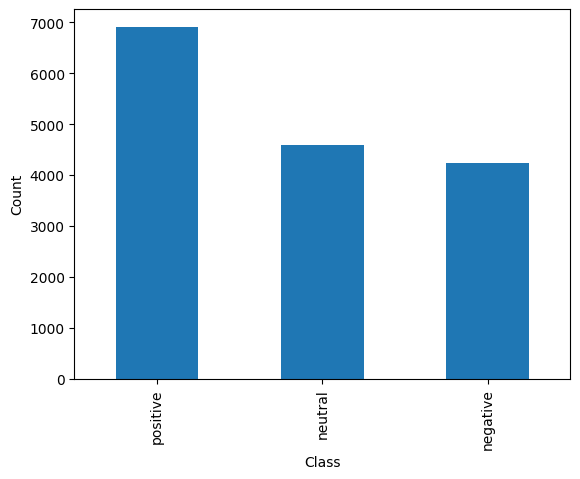

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\nNumber of instances and Classes in  Dataset:")
print("======================================================\n")
target_counts = training_data.sentiment.value_counts()
target_counts.plot.bar()
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

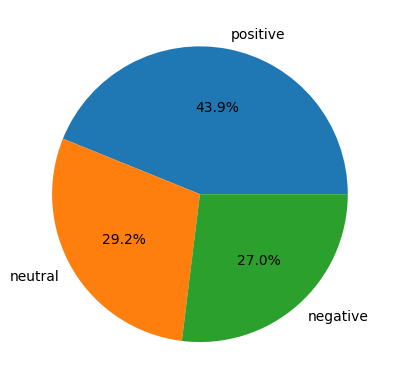

In [9]:
label_count = training_data['sentiment'].value_counts()
labels = ["positive", "neutral","negative"]

plt.pie(label_count, labels=labels, autopct='%1.1f%%')

plt.show()

## Data Preprocessing

In [10]:


def data_preprocessing(text):
    
    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

        # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # regular expression matches any string that starts with $
    text = re.sub(r'\$\w+\s*', '', text)

    # regular expression matches any string that starts with Contract: 0x (Contract: 0x) 
    text = re.sub(r'Contract: 0x\w+\s*', '', text)

    #regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # convert the text to lower case
    text = text.lower()

    # Remove all English Stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

        
    return text

In [11]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
# Apply the Preprocessing on Input Data Comments of Training Data
training_data['text'] = training_data['text'].apply(data_preprocessing)
preprocessed_training_data = training_data

print("\nTraining Data After Pre-processing:")
print("====================================\n")
preprocessed_training_data.head()


Training Data After Pre-processing:



,text,sentiment
0,even cocklane ghost laid round dozen years rap...,negative
1,likely enough rough outhouses tillers heavy la...,negative
2,daring burglaries armed men highway robberies ...,negative
3,giless search contraband goods mob fired muske...,negative
4,midst hangman ever busy ever worse useless con...,negative




### Tokenization of Training Data
The tokenization( to break down a sentence or a piece of text into its constituent words or subwords)   is performed and then the length of each word is measured.

In [13]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
Tokens = preprocessed_training_data['text'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_training_data["sentiment"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_training_data['text'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head()


Training Data After Tokenization :



,text,sentiment,Token_Length
0,"[even, cocklane, ghost, laid, round, dozen, ye...",negative,"[4, 8, 5, 4, 5, 5, 5, 7, 8, 7, 4, 4, 4, 14, 9,..."
1,"[likely, enough, rough, outhouses, tillers, he...",negative,"[6, 6, 5, 9, 7, 5, 5, 8, 5, 9, 7, 3, 4, 5, 11,..."
2,"[daring, burglaries, armed, men, highway, robb...",negative,"[6, 10, 5, 3, 7, 9, 4, 5, 7, 5, 5, 8, 8, 9, 2,..."
3,"[giless, search, contraband, goods, mob, fired...",negative,"[6, 6, 10, 5, 3, 5, 10, 10, 5, 3, 6, 7, 11, 4,..."
4,"[midst, hangman, ever, busy, ever, worse, usel...",negative,"[5, 7, 4, 4, 4, 5, 7, 8, 11, 9, 4, 4, 13, 9, 7..."


Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [14]:
preprocessed_training_data['Text length'] = preprocessed_training_data['text'].astype(str).apply(len)
preprocessed_training_data['word_count'] = preprocessed_training_data['text'].apply(lambda x: len(str(x).split()))
preprocessed_training_data.head()

,text,sentiment,Text length,word_count
0,even cocklane ghost laid round dozen years rap...,negative,126,17
1,likely enough rough outhouses tillers heavy la...,negative,201,28
2,daring burglaries armed men highway robberies ...,negative,754,99
3,giless search contraband goods mob fired muske...,negative,115,16
4,midst hangman ever busy ever worse useless con...,negative,317,41


Text(0.5, 0, 'Text length')

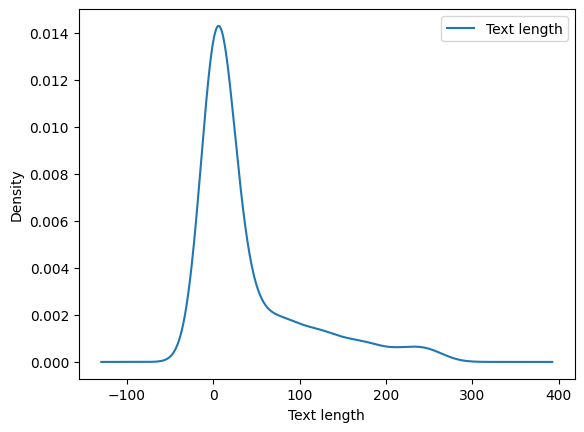

In [15]:
preprocessed_training_data['Text length'].value_counts().plot(kind='density')
plt.legend()
plt.xlabel('Text length')

## WordCloud of Data

A word cloud is a useful tool in text analysis that visually displays the most commonly used words in a text by enlarging them and using different colors. The larger and bolder the word, the more frequently it appears in the text, while smaller words are less important. This technique helps to represent the importance of words in the context of the text and their frequency.


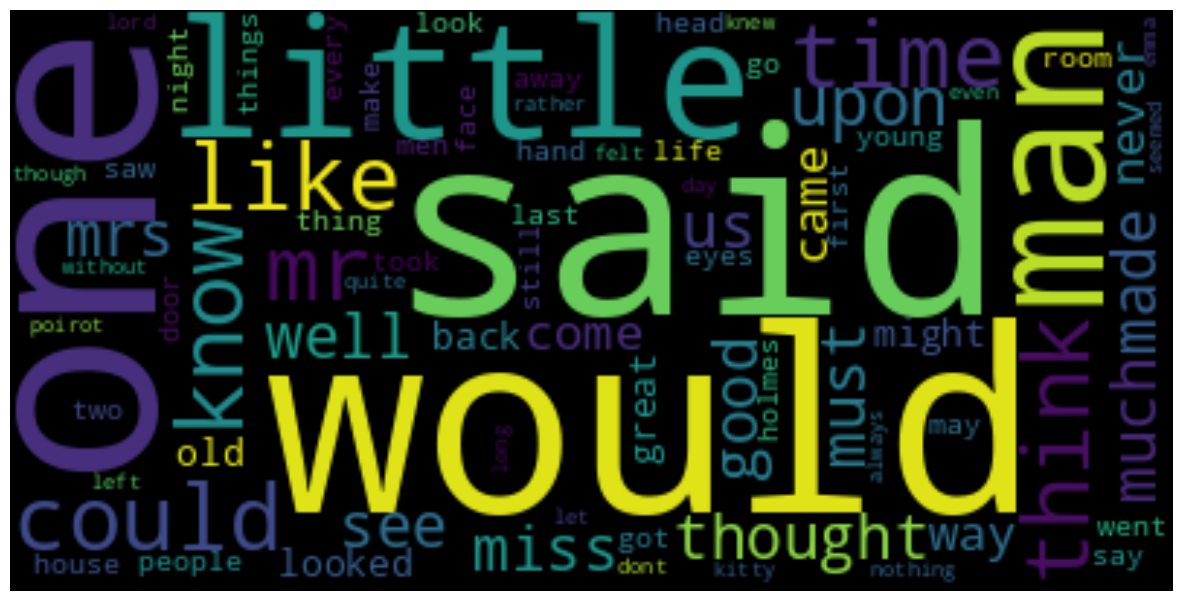

In [16]:
from wordcloud import WordCloud
text = ' '.join(preprocessed_training_data['text'])

# Calculate word frequency, count each word only once
word_freq = preprocessed_training_data['text'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, contour_width=3).generate_from_frequencies(word_freq)


plt.figure(figsize = (15, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

### SPLITTING_DATA_OUTPUTS/LABELS

In [17]:

# Split the Training Data Outputs / Labels and Create a DataFrame

training_data_output = pd.DataFrame(preprocessed_training_data.iloc[: , 1])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
training_data_output.head()


Output of Training Data:



,sentiment
0,negative
1,negative
2,negative
3,negative
4,negative


## Label Encoder for Target Attribute

In [18]:

from sklearn.preprocessing import LabelEncoder
# Target Attribute / Label 
label = pd.DataFrame({"label":["positive","neutral", "negative"]})

# Initialize the Label Encoder 
label_encode_label = LabelEncoder()

# Train the Label Encoder for Target Attribute Label
label_encode_label.fit(label)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [19]:

# Transform the Output Attribute (Gender) of Training Data into Numerical Representation
training_data_output["sentiment"] = label_encode_label.transform(training_data_output["sentiment"])

print("\nTraining Data After Encoded Output:")
print("===================================\n")
training_data_output


Training Data After Encoded Output:



,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
15753,0
15754,2
15755,0
15756,2


## Split Data into Training and Validation

In [20]:


X = pd.DataFrame(preprocessed_training_data['text'])
y = training_data_output

print("\nInput Shape of  Data")
print("============================\n")
print(X.shape)

print("\nOutput Shape of  Data")
print("============================\n")
print(y.shape)


Input Shape of  Data

(15758, 1)

Output Shape of  Data

(15758, 1)


In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_TEST =x_test

In [22]:
X_train = x_train.text.tolist()
X_test = x_test.text.tolist()

y_train = y_train.sentiment.tolist()
y_test = y_test.sentiment.tolist()

In [23]:
class_names = ['negative', 'neutral', 'positive']

print('size of training set: %s' % (len(x_train['text'])))
print('size of validation set: %s' % (len(x_test['text'])))


size of training set: 12606
size of validation set: 3152


## Downloading pretrained BERT model 


In [24]:
from ktrain import text
# Load the dataset
from ktrain import text
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=3000)



downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


## Analyzing Model's performance before Fine-tuning

In [25]:
# Create a BERT model without fine-tuning
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

# Evaluate the model on the test set
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)
learner.validate(val_data=(x_test, y_test), class_names=class_names)

Is Multi-Label? False
maxlen is 350


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.
99/99 [==============================] - 91s 840ms/step
              precision    recall  f1-score   support

    negative       0.67      0.00      0.00       850
     neutral       0.27      0.16      0.20       938
    positive       0.44      0.84      0.58      1364

    accuracy                           0.41      3152
   macro avg       0.46      0.33      0.26      3152
weighted avg       0.45      0.41      0.31      3152



array([[   2,  177,  671],
       [   0,  149,  789],
       [   1,  217, 1146]])

In [55]:
predictor = ktrain.get_predictor(learner.model, preproc)
class_names = predictor.get_classes()

In [54]:
# Predict the labels of the test data
y_pred = model.predict(x_test)

99/99 [==============================] - 84s 847ms/step


In [57]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [58]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.67      0.00      0.00       850
     neutral       0.27      0.16      0.20       938
    positive       0.44      0.84      0.58      1364

    accuracy                           0.41      3152
   macro avg       0.46      0.33      0.26      3152
weighted avg       0.45      0.41      0.31      3152



Accuracy: 0.4114847715736041
Precision: 0.45173866364380616
Recall: 0.4114847715736041
F1 Score: 0.31097844484777076


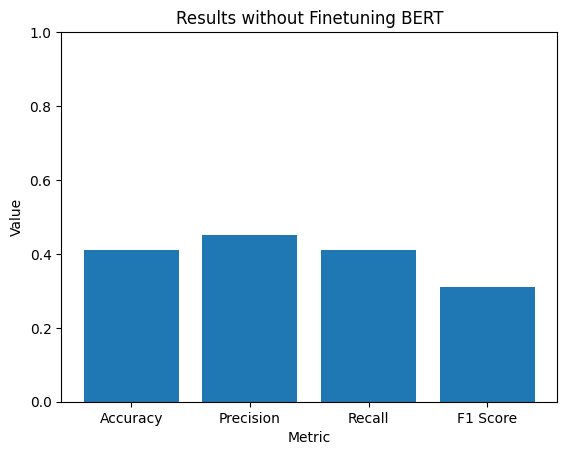

In [60]:
# Calculate the metrics
report = classification_report(y_true, y_pred, output_dict=True)
# Extract the weighted average metrics
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

# Plot the metrics as a bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]
plt.bar(labels, values)
plt.ylim((0, 1))
plt.title('Results without Finetuning BERT')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

# Train / Fine Tuned the model and tuning learning rates 

The fit_onecycle method is a training method provided by the Learner object in the ktrain library. It uses the 1cycle learning rate policy to train the model for a specified number of epochs.

The 2e-5 argument specifies the maximum learning rate to be used during training, and the 3 argument specifies the number of epochs to train the model for.

In [61]:
learner.fit_onecycle(2e-5, 2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
2101/2101 [==============================] - 1246s 585ms/step - loss: 0.6801 - accuracy: 0.7047 - val_loss: 0.4300 - val_accuracy: 0.8401
Epoch 2/2
2101/2101 [==============================] - 1176s 560ms/step - loss: 0.2707 - accuracy: 0.9074 - val_loss: 0.3025 - val_accuracy: 0.8902


## BERT Model Testing or Validation

The validate method is a method provided by the Learner object in the ktrain library, and it evaluates the performance of the trained model on a validation dataset. The val_data argument is a tuple containing the validation input data x_test and its corresponding target labels y_test.

The class_names argument specifies the names of the classes in the target labels. This argument is optional and is used to label the confusion matrix output.

In [62]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

99/99 [==============================] - 88s 892ms/step
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86       850
     neutral       0.91      0.87      0.89       938
    positive       0.90      0.92      0.91      1364

    accuracy                           0.89      3152
   macro avg       0.89      0.89      0.89      3152
weighted avg       0.89      0.89      0.89      3152



array([[ 734,   48,   68],
       [  55,  819,   64],
       [  74,   37, 1253]])

## Testing Data Predictions

In [63]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['negative', 'neutral', 'positive']

In [67]:
testing_data_values = X_TEST["text"].values

In [68]:
testing_data_prediction = predictor.predict(testing_data_values)

In [70]:
# Convert the predicted labels to a DataFrame
pred_df = pd.DataFrame({'target': testing_data_prediction})
pred_df['target'] = pred_df['target'].map({'negative': 0, 'neutral': 1, 'positive': 2})
# Print the predicted labels
pred_df.head(10)

,target
0,0
1,2
2,0
3,2
4,2
5,1
6,2
7,2
8,2
9,2


In [71]:
print(classification_report(y_true, pred_df, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.85      0.86      0.86       850
     neutral       0.91      0.87      0.89       938
    positive       0.90      0.92      0.91      1364

    accuracy                           0.89      3152
   macro avg       0.89      0.89      0.89      3152
weighted avg       0.89      0.89      0.89      3152



Accuracy: 0.8902284263959391
Precision: 0.8904656607580671
Recall: 0.8902284263959391
F1 Score: 0.8902205187536936


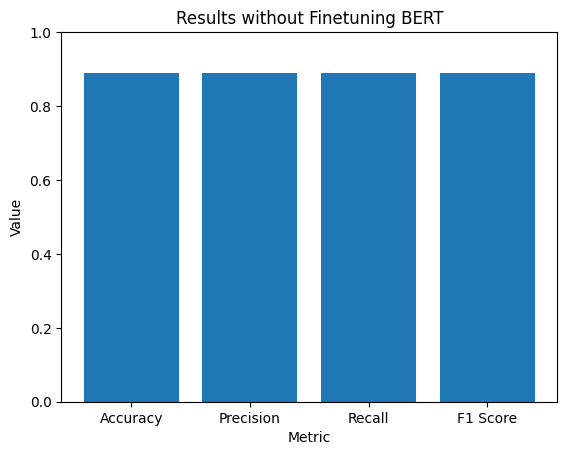

In [72]:
# Calculate the metrics
report1 = classification_report(y_true, pred_df, output_dict=True)
# Extract the weighted average metrics
accuracy = report1['accuracy']
precision = report1['weighted avg']['precision']
recall = report1['weighted avg']['recall']
f1_score = report1['weighted avg']['f1-score']

# Print the metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

# Plot the metrics as a bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score]
plt.bar(labels, values)
plt.ylim((0, 1))
plt.title('Results without Finetuning BERT')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

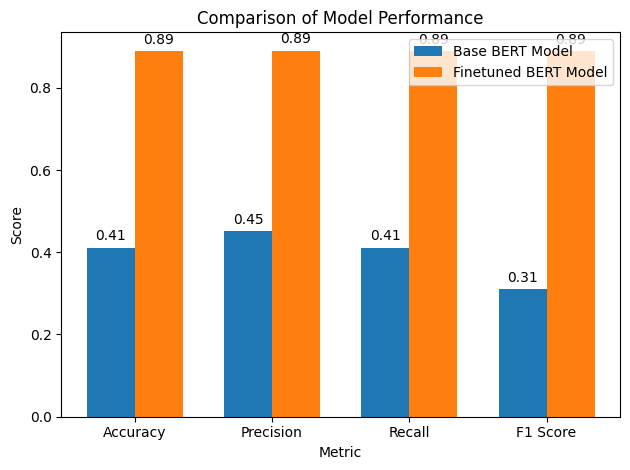

In [83]:
# Extract the relevant metrics from the classification reports
accuracy1 = report['accuracy']
accuracy2 = report1['accuracy']
weighted_avg_prec1 = report['weighted avg']['precision']
weighted_avg_prec2 = report1['weighted avg']['precision']
weighted_avg_rec1 = report['weighted avg']['recall']
weighted_avg_rec2 = report1['weighted avg']['recall']
weighted_avg_f11 = report['weighted avg']['f1-score']
weighted_avg_f12 = report1['weighted avg']['f1-score']

# Create a bar chart to compare the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model1_values = [accuracy1, weighted_avg_prec1, weighted_avg_rec1, weighted_avg_f11]
model2_values = [accuracy2, weighted_avg_prec2, weighted_avg_rec2, weighted_avg_f12]
x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, model1_values, width, label='Base BERT Model')
rects2 = ax.bar(x + width/2, model2_values, width, label='Finetuned BERT Model')

ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on the top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()